# Guide to arcgis.geometry module (Part 1)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#What-is-geometry?" data-toc-modified-id="What-is-geometry?-1.1">What is geometry?</a></span></li><li><span><a href="#Co-ordinate-Systems" data-toc-modified-id="Co-ordinate-Systems-1.2">Co-ordinate Systems</a></span><ul class="toc-item"><li><span><a href="#Geographic-coordinate-system" data-toc-modified-id="Geographic-coordinate-system-1.2.1">Geographic coordinate system</a></span></li><li><span><a href="#Projected-coordinate-system" data-toc-modified-id="Projected-coordinate-system-1.2.2">Projected coordinate system</a></span></li><li><span><a href="#Vertical-coordinate-system" data-toc-modified-id="Vertical-coordinate-system-1.2.3">Vertical coordinate system</a></span></li></ul></li><li><span><a href="#Creating-geometries" data-toc-modified-id="Creating-geometries-1.3">Creating geometries</a></span><ul class="toc-item"><li><span><a href="#Point" data-toc-modified-id="Point-1.3.1">Point</a></span></li><li><span><a href="#Polyline" data-toc-modified-id="Polyline-1.3.2">Polyline</a></span></li><li><span><a href="#Polygon" data-toc-modified-id="Polygon-1.3.3">Polygon</a></span></li></ul></li><li><span><a href="#Working-with-geometry-object" data-toc-modified-id="Working-with-geometry-object-1.4">Working with geometry object</a></span></li><li><span><a href="#Projection-of-map-and-geometry" data-toc-modified-id="Projection-of-map-and-geometry-1.5">Projection of map and geometry</a></span></li></ul></li><li><span><a href="#Interacting-with-map-widget" data-toc-modified-id="Interacting-with-map-widget-2">Interacting with map widget</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3">Conclusions</a></span></li></ul></div>

## Introduction


### What is geometry?

As defined by <a href="http://help.arcgis.com/en/geodatabase/10.0/sdk/arcsde/concepts/geometry/geometry.htm">ArcGIS Resource Center</a>, `geometry` is, in terms of Mathmatics, "dealing with spatial relationships, measures, and properties of points, lines, and surfaces", while in GIS applications, geometry in the form of vector, is used to "represent the spatial component of geographic features with discrete boundaries such as wells, rivers, states, streets, and parcels".

The Geometry class provides functionality common to all types of geometry. `Point`, `Multipoint`, `Polyline`, `Polygon`, and `Envelope` all inherit from `Geometry`, and represent different types of shapes (as shown in the OMD below):

<img src="https://developers.arcgis.com/android/latest/guide/GUID-D81A9110-0CD3-4897-ACF2-0B54F9217A6D-web.png" />
<h5><center>Fig 1. The hierarchy of Geometry object models (Source: <a href="https://developers.arcgis.com/android/latest/guide/geometries.htm">Esri Runtime</a>).</center></h5>

The following are common geometry characteristics:
  - Geometries have a spatial reference indicating the coordinate system used by its coordinates.
  - Geometries can be empty, indicating that they have no specific location or shape.
  - Geometries can have z-values and/or m-values.
  - Geometries can be converted to and from JSON to be persisted or to be exchanged directly with REST services.

The ArcGIS geometric model is centered around operations on various types of geometric shapes, also called `feature classes`. Shapes represent geometric objects in two-dimensional planar space that are useful for GIS applications. Shapes can be 0-dimensional points, 1-dimensional lines, and 2-dimensional areas. Each shape has a spatial reference system which describes the coordinate space in which the shape is defined.

The spatial reference system for a shape describes the `coordinate system` in which it is defined. Spatial data often is defined with different coordinate systems. To integrate spatial data from various sources, the data must be transformed to a common coordinate system. The spatial reference system must be clearly defined not only to verify the integrity of geometric calculations between shapes, but also to allow transformations to take place between shapes in different coordinate systems.


### Co-ordinate Systems

#### Geographic coordinate system

According to <a href="http://help.arcgis.com/en/geodatabase/10.0/sdk/arcsde/concepts/geometry/coordref/coordsys/coordsys.htm">ArcGIS Resource Center</a>, "a part of what defines a data set is its coordinate system". A coordinate system includes such information as the unit of measure, the Earth model used, and sometimes, how the data was flattened. A datum helps to define locations on the Earth's surface in a three-dimensional coordinate system called a `geographic coordinate system`. **A geographic coordinate system is defined by a datum, an angular unit of measure (usually either degrees or grads), and a prime meridian**. Common datums include WGS84 (used in GPS) and NAD83 (used in surveying and mapping in North America).

The following example is a string representing a geographic coordinate system (GCS) based on the WGS 1984 datum, and you can see these three parts in the well-known text (WKT) for the `EPSG:4326` spatial reference in the DATUM, PRIMEM and UNIT sections:
```
GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984", SPHEROID["WGS_1984",6378137, 298.257223563]],
                            PRIMEM["Greenwich",0],
                            UNIT["Degree",0.0174532925199433]]
```

#### Projected coordinate system

However, many analysis techniques and data are designed for two-dimensional or planar coordinates. Three-dimensional geographic data is converted to planar coordinates via a map projection. A map projection is a set of mathematical equations to convert from longitude and latitude (i, j) to planar coordinates (x, y). Converting from three to two dimensions causes distortions. A map projection is designed to minimize the distortion caused by flattening the Earth's surface. **A projected coordinate system consists of a linear unit of measure (usually meters or feet), a map projection, the specific parameters used by the map projection, and a geographic coordinate system**. The following example is the string representation of the California State Plane Zone, which is a projected coordinate system (PCS), and you can see that `EPSG:3857` references the same DATUM, SPHEROID, PRIMEM and UNIT fields as the 4236 projection. It also defines a PROJECTION (Mercator_Auxiliary_Sphere) which defines how to project the 3D GEOGCS coordinates into 2D coordinates:

```
PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",
       GEOGCS["GCS_WGS_1984",
              DATUM["D_WGS_1984", SPHEROID["WGS_1984",6378137.0,298.257223563]],
              PRIMEM["Greenwich",0],
              UNIT["Degree",0.017453292519943295]],
       PROJECTION["Mercator_Auxiliary_Sphere"], PARAMETER["False_Easting",0.0],
                                                PARAMETER["False_Northing",0.0],
                                                PARAMETER["Central_Meridian",0.0],
                                                PARAMETER["Standard_Parallel_1",0.0],
                                                PARAMETER["Auxiliary_Sphere_Type",0.0],
                                                UNIT["Meter",1.0]]
```

#### Vertical coordinate system
Unlike GCS and PCS, both defining Coordinate Systems horizontally, a `vertical coordinate system` defines the origin for height or depth values. The most important part of a vertical coordinate system (VCS) is its unit of measure, which is always linear. Another important part is whether the z values are heights (elevations), or depths. The axis directions are, positive respectively, up or down. Depths are always displayed as positive values. Also, a VCS can be referenced to two different types of surfaces:
  - spheroidal (ellipsoidal); A spheroidal VCS defines heights that are referenced to spheroid of a GCS. GPS natively reports heights relative to the WGS84 ellipsoid. An on-board geoid model (discussed below) converts the ellipsoidal heights to gravity-related elevations. A spheroidal height is a geometry quantity and does not have a physical sense as a GCS's spheroid may fall above or below the actual earth surface. Spheroidal heights for an area may not reflect movement due to gravity, that is, the flow of water. Water can run uphill when working with spheroidal heights. A VCS with heights or depths that are referenced to the spheroid will include a datum , rather than a vertical datum definition. An example is shown below.
```
VERTCS["WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],
       PARAMETER["Vertical_Shift",0.0],PARAMETER["Direction",1.0],UNIT["Meter",1.0]]
```
  - gravity-related (geoidal). Most VCS are gravity-related. A gravity-related VCS is often only loosely connected to a particular GCS. Any particular VCS may be used with different horizontal coordinate systems. A gravity-related VCS may set its zero point through a local mean sea level or a benchmark. Mean sea level will vary at different places due to topography, atmospheric effects, etc. A gravity-related VCS will include a vertical datum as part of its definition. An example is shown below.
```
VERTCS["National_Geodetic_Vertical_Datum_1929",VDATUM["NGVD_1929"],
       PARAMETER["Vertical_Shift",0.0],PARAMETER["Direction",1.0],UNIT["Meter",1.0]]
```


### Creating geometries

The arcgis.geometry module defines useful geometry types for working with geographic information and GIS functionality. It provides functions which use geometric types as input and output as well as functions for easily converting geometries between different representations.

Several functions accept geometries represented as dictionaries and the geometry objects in this module behave like them as well as support the ‘.’ (dot) notation providing attribute access.

In [1]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode
from arcgis.geometry import lengths, areas_and_lengths, project
from arcgis.geometry import Point, Polyline, Polygon, Geometry

In [2]:
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123", verify_cert=False)

#### Point

A <a href="https://developers.arcgis.com/python/api-reference/arcgis.geometry.html?highlight=point#arcgis.geometry.Point">point</a> contains x and y fields along with a `spatialReference` field. A point can also contain m and z fields. A point is empty when its x field is present and has the value null or the string `NaN`. An empty point has no location in space.

In [41]:
pt = Point({"x" : -118.15, "y" : 33.80, "spatialReference" : {"wkid" : 4326}})
print(pt.is_valid())

True


In [42]:
print(pt.is_empty)

False


In [43]:
print(pt.type)

Point



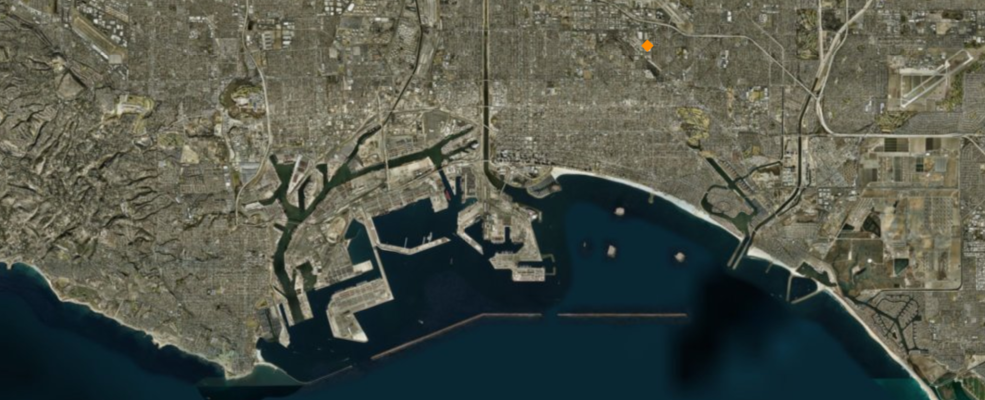

In [47]:
map0 = gis.map("Port of Long Beach")
map0.basemap = "satellite"
map0.zoom = 6
map0

In [45]:
pt_sym = {
    "type": "esriSMS",
    "style": "esriSMSDiamond",
    "color": [255,140,0,255],        
    "size": 8,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0,
    "outline": {
        "color": [255,140,0,255],
        "width": 1}
}
map0.draw(pt, symbol=pt_sym)

#### Polyline

A <a href="https://developers.arcgis.com/python/api-reference/arcgis.geometry.html?highlight=point#polyline">polyline</a> contains an array of `paths` or `curvePaths` and a `spatialReference`. For polylines with curvePaths, see the sections on JSON curve object and Polyline with curve. Each path is represented as an array of points, and each point in the path is represented as an array of numbers. A polyline can also have boolean-valued `hasM` and `hasZ` fields. An empty polyline is represented with an empty array for the paths field. `Null`s and/or `NaN`s embedded in an otherwise defined coordinate stream for polylines/polygons is a syntax error.

First, let us try initializing an invalid polyline object, and see how it is handled.

In [48]:
line = {
  "paths" : [[[-97.06138],[-97.06133,32.836],[-97.06124,32.834],[-97.06127,32.832]],
             [[-97.06326,32.759],[-97.06298,32.755]]],
  "spatialReference" : {"wkid" : 4326}
}
polyline = Polyline(line)

In [49]:
print(polyline.spatialReference)

{'wkid': 4326}


In [50]:
print(polyline.is_valid())

False



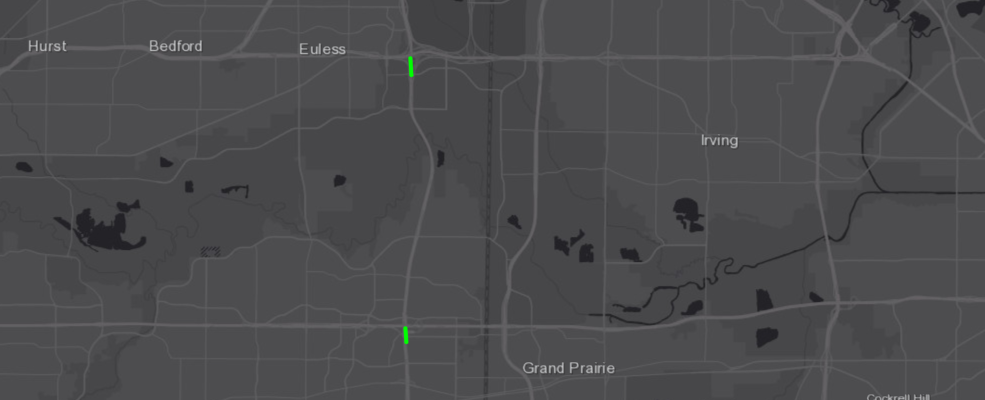

In [73]:
map1 = gis.map("Port of Long Beach")
map1.basemap = "dark-gray"
map1.zoom = 6
map1

In [53]:
map1.draw(polyline) # would not draw anything

Then, try a valid polyline geometry.

In [68]:
line1 = {
  "paths" : [[[-97.06138,32.837],[-97.06133,32.836],[-97.06124,32.834],[-97.06127,32.832]],
             [[-97.06326,32.759],[-97.06298,32.755]]],
  "spatialReference" : {"wkid" : 4326}
}
polyline1 = Polyline(line1)
print(polyline1.is_valid())

True


In [69]:
polyline1.svg()

'<g><polyline fill="none" stroke="#66cc99" stroke-width="2.0" points="-97.06138,32.837 -97.06133,32.836 -97.06124,32.834 -97.06127,32.832" opacity="0.8" /><polyline fill="none" stroke="#66cc99" stroke-width="2.0" points="-97.06326,32.759 -97.06298,32.755" opacity="0.8" /></g>'

In [70]:
map1.center = {  'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
                 'x': -10801694.467855213,
                 'y': 3868771.7699954524}

In [71]:
sym_poly_aoi = {
  "type": "esriSFS",
  "style": "esriSFSSolid",
  "color": [0,0,0,0],
    "outline": {
     "type": "esriSLS",
     "style": "esriSLSSolid",
     "color": [0,255,0,255],
     "width": 3}
}
map1.draw(polyline1, symbol = sym_poly_aoi)

#### Polygon

A <a href="https://developers.arcgis.com/python/api-reference/arcgis.geometry.html?highlight=point#polygon">polygon</a> contains an array of `rings` or `curveRings` and a `spatialReference`. Each ring is represented as an array of points. The first point of each ring is always the same as the last point. Each point in the ring is represented as an array of numbers. A polygon can also have boolean-valued `hasM` and `hasZ` fields. An empty polygon is represented with an empty array for the rings field. `Null`s and/or `NaN`s embedded in an otherwise defined coordinate stream for polylines/polygons is a syntax error. 

Exterior rings are oriented clockwise, while holes are oriented counter-clockwise. Rings can touch at a vertex or self-touch at a vertex, but there should be no other intersections.

In [74]:
geom = Geometry({
  "rings" : [[[-97.06138,32.837],[-97.06133,32.836],[-97.06124,32.834],[-97.06127,32.832], [-97.06138,32.837]],
             [[-97.06326,32.759],[-97.06298,32.755],[-97.06153,32.749],[-97.06326,32.759]]
            ],
  "spatialReference" : {"wkid" : 4326}
})

In [115]:
geom = Polygon({'spatialReference': {'latestWkid': 4326}, 
                'rings': [[[-97.06587202923951, 32.75656343500563], [-97.07033522518535, 32.75454232619796],
                           [-97.07179434702324, 32.75443405154119], [-97.073596791488, 32.75475887587208],
                           [-97.07501299810983, 32.75475887587208], [-97.07492716677937, 32.75616643554153],
                           [-97.07595713555828, 32.75602207118053], [-97.07115061698558, 32.75887321736912],
                           [-97.06930525730476, 32.75890930713694], [-97.06479914614289, 32.75739351976198],
                           [-97.06587202923951, 32.75656343500563]]]
                })

In [116]:
print (geom.type)

Polygon


In [117]:
print(isinstance(geom, Polygon))

True



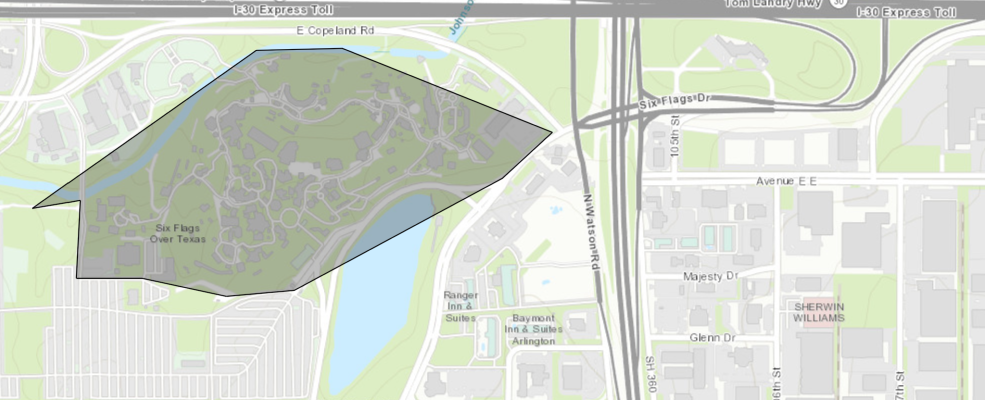

In [143]:
map3 = gis.map()
map3.basemap = "topo"
map3.zoom = 16
map3.center = {'x': -97.05815464365813, 'y': 32.75494892021667, "spatialReference" : {"wkid" : 4326}}
map3

In [120]:
map3.draw(geom)

In [121]:
print("Geometry represented in JSON:\n", geom.JSON, 
      "\n\nGeometry represented in WKB:\n", geom.WKB, 
      "\n\nGeometry represented in WKT:\n", geom.WKT)

Geometry represented in JSON:
 {"rings":[[[-97.065872029239515,32.756563435005631],[-97.070335225185346,32.754542326197956],[-97.071794347023243,32.754434051541189],[-97.073596791488001,32.754758875872078],[-97.075012998109827,32.754758875872078],[-97.074927166779375,32.75616643554153],[-97.075957135558284,32.756022071180531],[-97.071150616985577,32.758873217369121],[-97.069305257304762,32.758909307136939],[-97.064799146142889,32.757393519761983],[-97.065872029239515,32.756563435005631]]],"spatialReference":{"wkid":4326,"latestWkid":4326}} 

Geometry represented in WKB:
 bytearray(b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\x83\xd3P?7DX\xc0lY\x15\x12\xd7`@@\x84_Q\xab%DX\xc0?\xcaVE\xf2`@@&dQ\x7foDX\xc0?d\xaf\xf0#a@@\xc5BQ\xbb\x8dDX\xc0\x914\xf1\xc1"a@@\xb9GQ{\xdcDX\xc0%c\xcbT\xc5`@@\x8f\xb9P\x9b\xcbDX\xc0\xec}\xcf\x0f\xca`@@\x06jQ\x03\xcdDX\xc0?\x1eX\xf0\x9b`@@\x04"Q\xcf\xb5DX\xc0?\x1eX\xf0\x9b`@@) QG\x98DX\xc0\xd9-\x85K\x91`@@b\xfbP_\x80DX

In [122]:
geom1 = Geometry({'spatialReference': {'latestWkid': 3857, 'wkid': 102100}, 
                  'rings': [[[-10806331.461044524, 3862983.679353406], [-10806446.116586955, 3862964.5700963344], 
                             [-10805911.057388945, 3863341.9779235027], [-10805705.632875424, 3863346.7552377703], 
                             [-10805204.01487729, 3863146.1080385167], [-10805323.447733987, 3863036.229810354],  
                             [-10805820.288417853, 3862768.7002113485], [-10805982.717102963, 3862754.368268545], 
                             [-10806183.364302218, 3862797.3640969563], [-10806341.01567306, 3862797.3640969563], 
                             [-10806331.461044524, 3862983.679353406]]]})
map3.draw(geom1, symbol="+")

In [123]:
geom1.type

'Polygon'

Next, the `project` function is performed on a geometry service resource, in projecting an array of input geometries from the input spatial reference to the output spatial reference.

In [127]:
geom1_reprojected = project([geom1], 3857, 4326)[0]
geom1_reprojected.type

'Polygon'

In [129]:
print("Geometry represented in JSON:\n", geom1_reprojected.JSON, 
      "\n\nGeometry represented in WKB:\n", geom1_reprojected.WKB, 
      "\n\nGeometry represented in WKT:\n", geom1_reprojected.WKT)

Geometry represented in JSON:
 {"rings":[[[-97.065872029239515,32.756563435005631],[-97.070335225185346,32.754542326197956],[-97.071794347023243,32.754434051541189],[-97.073596791488001,32.754758875872078],[-97.075012998109827,32.754758875872078],[-97.074927166779375,32.75616643554153],[-97.075957135558284,32.756022071180531],[-97.071150616985577,32.758873217369121],[-97.069305257304762,32.758909307136939],[-97.064799146142889,32.757393519761983],[-97.065872029239515,32.756563435005631]]],"spatialReference":{"wkid":4326,"latestWkid":4326}} 

Geometry represented in WKB:
 bytearray(b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x00\x00\x00\x83\xd3P?7DX\xc0lY\x15\x12\xd7`@@\x84_Q\xab%DX\xc0?\xcaVE\xf2`@@&dQ\x7foDX\xc0?d\xaf\xf0#a@@\xc5BQ\xbb\x8dDX\xc0\x914\xf1\xc1"a@@\xb9GQ{\xdcDX\xc0%c\xcbT\xc5`@@\x8f\xb9P\x9b\xcbDX\xc0\xec}\xcf\x0f\xca`@@\x06jQ\x03\xcdDX\xc0?\x1eX\xf0\x9b`@@\x04"Q\xcf\xb5DX\xc0?\x1eX\xf0\x9b`@@) QG\x98DX\xc0\xd9-\x85K\x91`@@b\xfbP_\x80DX

Though `geom1` and `geom1_reprojected` are within two `SpatialReference`, they should draw as identical shapes on the map widget.

In [128]:
map3.clear_graphics()
map3.draw(geom1_reprojected, symbol="x")

### Working with geometry object

Properties of geometry objects include,
  - `centroid`: returns the center of the geometry
  - `area`: returns the area of a polygon feature, or None for all other feature types. The area is in the units of the spatial reference.
  - `length`: returns the length of the linear feature, or zero for point and multipoint feature types. The length units is the same as the spatial reference.
  - `extent`: returns the extent of the geometry as a tuple containing xmin, ymin, xmax, ymax.
  - `as_arcpy`: returns the class as an arcpy SpatialReference object
  - `as_shapely`: returns a shapely geometry object

You will see that for geometry objects in different spatial references, the properties return varied results (transformed through the spatial reference).

In [130]:
geom1.centroid, geom1_reprojected.centroid

((-10805839.610595193, 3863047.349714484),
 (-97.0705088053709, 32.75664742013892))

In [131]:
geom1.area, geom1_reprojected.area

(431509.38663978304, 2.9284047752262596e-05)

In [132]:
geom1.length, geom1_reprojected.length

(2955.798323907705, 0.025605496007056323)

In [133]:
geom1.extent, geom1_reprojected.extent

((-10806446.116586955,
  3862754.368268545,
  -10805204.01487729,
  3863346.7552377703),
 (-97.07595713555828,
  32.75443405154119,
  -97.06479914614289,
  32.75890930713694))

In [178]:
try:
    geom1.as_shapely
except OSError as e:
    print(e)

[WinError 126] The specified module could not be found


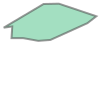

In [175]:
geom1_reprojected.as_arcpy

### Projection of map and geometry

As shown above, `geom1` and `geom1_reprojected` are overlapping with each other on the displayed map widget, since they are the same geometry being represented in two co-ordinates systems - 3857, and 4326, respectively.


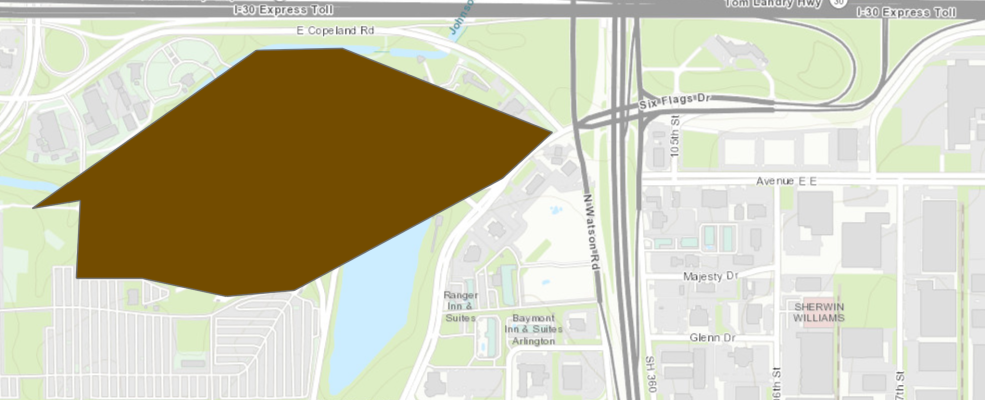

In [144]:
map4 = gis.map()
map4.basemap = "topo"
map4.zoom = 16
map4.center = {'x': -97.05815464365813, 'y': 32.75494892021667, "spatialReference" : {"wkid" : 4326}}
map4

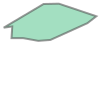

In [139]:
# Compared to `geom_projected = project([geom], 4326, 3857)[0]`
geom_projected = geom1_reprojected
geom_projected.project_as(spatial_reference=3857)
geom_projected

In [140]:
map4.draw(  geom_projected, 
            symbol = {
                      "type": "esriSFS",
                      "style": "esriSFSSolid",
                      "color": [115,76,0,255],
                        "outline": {
                         "type": "esriSLS",
                         "style": "esriSLSSolid",
                         "color": [110,110,110,255],
                         "width": 1}
                    })

## Interacting with map widget

The following use case uses the `arcgis.geometry` module to compute the length of a path that the user draws on the map.

The particular scenario is of a jogger who runs in the Central Park in New York (without gizmos like GPS watches to distract him), and wants a rough estimate of his daily runs based on the path he takes. The notebook starts out with a satellite map of Central Park in New York:


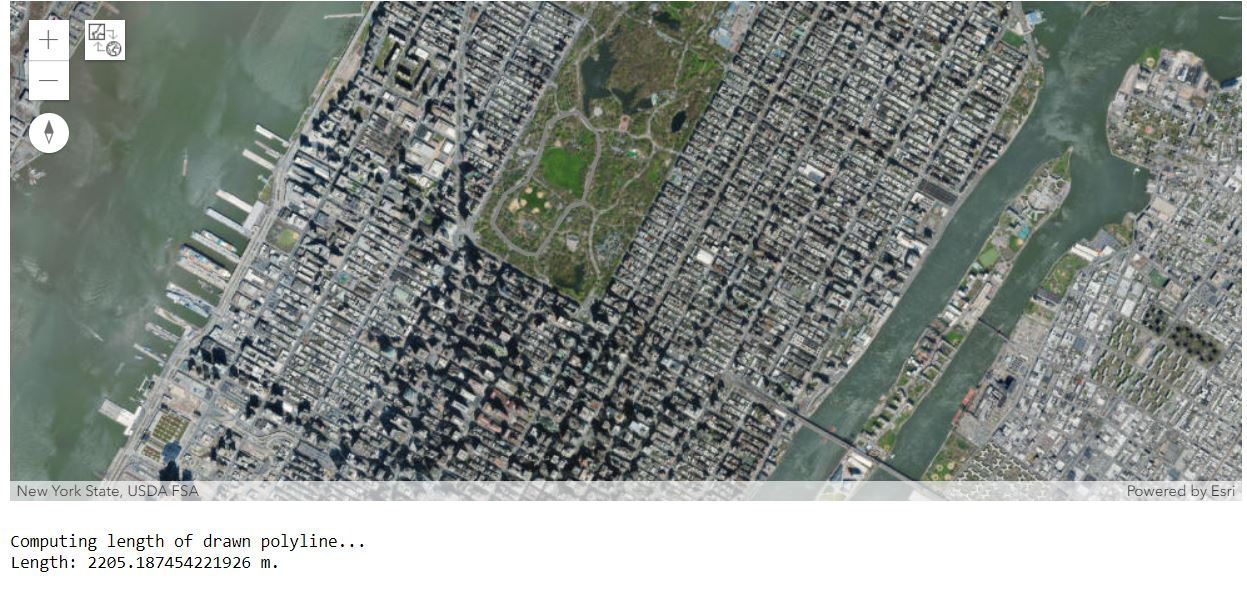

In [4]:
map5 = gis.map()
map5.basemap = "satellite"
map5

In [155]:
map5.height = '650px'

In [156]:
location = geocode("Central Park, New York")[0]
map5.extent = location['extent']

In [157]:
map5.zoom = 14

We want the user to draw a freehand polyline to indicate the paths that the runner takes for his/her runs. When the drawing operation ends, we use the GIS's Geometry service to compute the length of the drawn path. We can do this by adding an event listener to the map widget that gets called when drawing is completed (i.e. `on_draw_end`). The event listener then computes the geodesic length of the drawn geometry using the geometry service and prints it out:

In [158]:
# Define the callback function that computes the length.
def calc_dist(map1, g):
    print("Computing length of drawn polyline...")
    length = lengths(g['spatialReference'], [g], "", "geodesic")
    print("Length: " + str(length[0]) + " m.")

# Set calc_dist as the callback function to be invoked when a polyline is drawn on the map
map5.on_draw_end(calc_dist)

In [159]:
map5.draw("polyline")


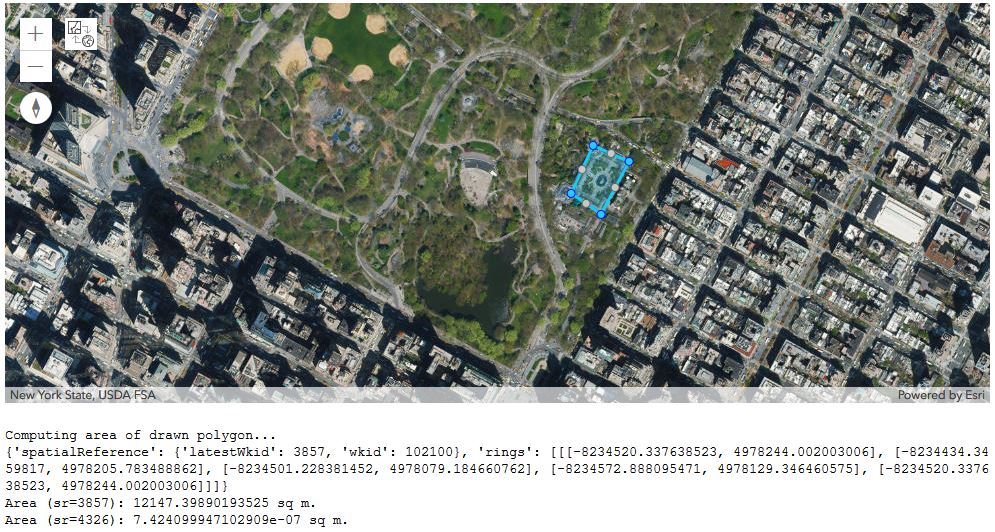

In [180]:
map6 = gis.map()
map6.basemap = "satellite"
map6

In [169]:
map6.height= "650px"

location = geocode("Central Park, New York")[0]
map6.extent = location['extent']

Now draw a polygon on the map representing the route taken by the jogger

In [170]:
# Define the callback function that computes the area.
def calc_area(map1, g):
    print("Computing area of drawn polygon...")
    print(g)
    """
    area = areas_and_lengths(polygons = [g],
                             length_unit = "esriSRUnit_Meter",
                             area_unit = "esriSquareMeters",
                             calculation_type = "geodesic",
                             spatial_ref = g['spatialReference'])
    print("Area-1: " + str(area) + " sq m.")
    """
    area0 = Polygon(g).area
    print("Area (sr=3857): " + str(area0) + " sq m.")
    area = project(geometries=[Polygon(g)], in_sr=g['spatialReference'], out_sr=4326)[0].area
    print("Area (sr=4326): " + str(area) + " sq m.")

# Set calc_dist as the callback function to be invoked when a polygon is drawn on the map
map6.on_draw_end(calc_area)

In [171]:
map6.draw("polygon")

In [ ]:
map6.clear_graphics()

## Conclusions

In this Part 1 of the guide series to `arcgis.geometry` module, you have seen the introduction to the module, how to create geometry objects, what are the basic properties, and how to work with one, including its interactions with map widgets.

Next, Part 2 will discuss the spatial operations of geometry objects, and how to process through geometry services, while Part 3 will talk about geometry filters and how they being applied in query, search and mapping. Please stay with us.